# **RR9 Phenotypes Notebook Overview**

In this notebook, we will be exploring [phenotypic](https://www.genome.gov/genetics-glossary/Phenotype) data that were collected during the NASA [Rodent Research 9 mission (RR9)](https://www.nasa.gov/ames/space-biosciences/rodent-research-9-spacex-12/). The goal of this scientific mission to the International Space Station was to study the effects of spaceflight on the eye and vision by collecting data on rodents flown in space.


We will be using data from the following [NASA Open Science Data Repository](https://osdr.nasa.gov/bio/) RR9 datasets:
1. [OSD-557](https://osdr.nasa.gov/bio/repo/data/studies/OSD-557)
2. [OSD-568](https://osdr.nasa.gov/bio/repo/data/studies/OSD-568)
3. [OSD-583](https://osdr.nasa.gov/bio/repo/data/studies/OSD-583)

These phenotypic datasets include data from several biological measurements including [microcomputed tomography](https://en.wikipedia.org/wiki/X-ray_microtomography) (OSD-557), [immunostaining microscopy](https://en.wikipedia.org/wiki/Immunofluorescence) (OSD-568), and [tonometry](https://en.wikipedia.org/wiki/Ocular_tonometry) (OSD-583).  All measurements were collected on both ground control and spaceflight rodent samples and converted to tabular format to enable data accessibility.


## **Scientific Background on the RR9 Mission**

![Rodent Research 9](https://upload.wikimedia.org/wikipedia/commons/d/d1/Rodent_Research-9_Mission_Patch.jpg)

The [RR9 mission](https://www.nasa.gov/ames/space-biosciences/rodent-research-9-spacex-12/) flew 3 NASA Space Biology experiments to the International Space Station. The scientific goal of these experiments was to assess the effects of microgravity on different biological systems.

One experiment studied the effect of spaceflight on fluid shifts and the increased fluid pressures in the head, which contribute to visual impairment.

The second experiment studied the effect of spaceflight on blood vessels in the eyes.

The third experiment studied the effect of spaceflight on knee and hip joint degradation.





## **Spaceflight Associated Neuro-ocular Syndrome (SANS)**

The RR9 mission focused heavily on ocular and vision effects because previous work has shown that fluid shifts and other physiological changes contribute to visual impairment in spaceflight.

Collectively, changes in vision in spaceflight are referred to as [Spaceflight Associated Neuro-ocular Syndrome (SANS)](https://www.nature.com/articles/s41526-020-0097-9). As shown in the image below, SANS can affect different parts of the eye through different mechanisms including swelling of the eye or the optic nerve.

![](https://www.mdpi.com/life/life-13-01263/article_deploy/html/images/life-13-01263-g006-550.jpg)

*Image citation: https://www.mdpi.com/2075-1729/13/6/1263*


> **We will be using the data from the RR9 mission to study the effects of spaceflight on rodent eye and retina.**








## **Basic statistical analysis**
In this notebook, we will use statistical analysis tools to explore all the data from RR9 that pertains to the effect of spaceflight on the eye.


We will be using the [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test), [Wilcoxon signed-rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test), and [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) to determine the significance of the difference of the distributions of the various data between ground and spaceflight samples.

We will also be plotting a [box-and-whisker plot](https://en.wikipedia.org/wiki/Box_plot) distinguishing space flight from ground samples for each of the measures taken in these studies.

We will show statistical results which include all the samples and those results which exclude some of the samples.




**QUESTIONS**

1. What is currently thought to be the cause of visual impairment in astronauts on long space missions?

2. Is spaceflight-associated neuro-ocular syndrome (SANS) recognized by the medical community as an official diagnosis?

3. Does SANS induce a hyperopic shift or myopic shift in the focal point?

**Double click here to enter your answers to the questions in this text box.**

1.

2.

3.

# **Read In Methods**

Here we are reading in methods from the `methods.ipynb` notebook that you copied into your Google Drive.

Today we are using these methods as-is, but later in the "Working With Data" Module we will explain the methodology so that you can reproduce them.

In [1]:
# install and import the import_ipynb module enabling the import of methods from remote notebooks
!pip install import_ipynb
import import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s eta 0:00:00


In [2]:
# mount your google drive to this notebook
from google.colab import drive
drive.flush_and_unmount()
drive.mount("mnt")


Drive not mounted, so nothing to flush and unmount.
Mounted at mnt


In [3]:
# import the methods from the methods.ipynb notebook
m = __import__("mnt/MyDrive/Colab Notebooks/Copy of methods")

importing Jupyter notebook from mnt/MyDrive/Colab Notebooks/Copy of methods.ipynb
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 166.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 138.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 160.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 140.2 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=19e68e2c793259b7361e73cb8e78713d403996a978b077897a70b41564615ebd
  Stored in directory: /tmp/pip-ephem-wheel-cache-_worwoi8/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 792.2 kB

In [ ]:
# define data dictionary for notebook
data=dict()

# **OSD-557 Data Exploration**

The [OSD-557 dataset](https://osdr.nasa.gov/bio/repo/data/studies/OSD-557) contains measurements from 10 male mice that were flown on board the International Space Station during the RR9 mission for 35 days. This dataset also contains data from two sets of control mice. The 10 "Ground Control" mice were housed on the ground for the duration of the flight in cages that replicate the spaceflight cages; while the 10 "Vivarium Control" mice were housed on the ground in the standard mouse vivarium cages to control for variability in housing.

The eyes from each mouse were collected for analysis after return to Earth and euthanasia.


## **Explore the microCT data from OSD-557**

First, we will be exploring the *micro-computed tomography* (microCT) data from the OSD-557 dataset.

[microCT](https://en.wikipedia.org/wiki/X-ray_microtomography) is a method that uses X-rays to create cross-sections of a physical object that can be used to recreate a 3D model of the object. This 3D model can be used to measure different aspects of the object. In this dataset, we will be examining measurements of the following parts of the mouse eye:

* Anterior-Posterior (Ant-Post) - top to bottom
* Superior-Inferior (Sup-Inf) - front to back
* [Retina](https://en.wikipedia.org/wiki/Retina)
* Retina pigment layer (Pigment)
* [Choroid](https://en.wikipedia.org/wiki/Choroid)
* [Sclera](https://en.wikipedia.org/wiki/Sclera)

The researchers measured changes in each of these parts of the eye in order to compare them between the flight and control mice, to see whether spaceflight causes changes in the size of these parts of the eye.

For example, the figure below shows how the researchers generated the measurements above from the 3D model of the "F10" mouse (the 10th spaceflown mouse).

![](https://cloudfront.jove.com/files/ftp_upload/61227/61227fig02.jpg)

*Figure citation: https://www.jove.com/t/61227/assessment-global-ocular-structure-following-spaceflight-using-micro*

**QUESTIONS**

1. Which type of radiation is used in microCT?

2. What does "Sup-Inf" and "Ant-Post" mean in anatomy?

3. Which format of the microCT data is used for data mining such as in this notebook - raw images or transformed tabular results?

**Double click here to enter your answers to the questions in this text box.**

1.

2.

3.


____

First, we will read in the microCT measurement data, using the `read_phenotype_data()` function defined in the `methods.ipynb` notebook.

After reading in, the microCT dataset is stored in a Python `pandas` dataframe. We use the function `head()` to print the first 5 rows of the dataframe to the screen. Each row represents a different mouse eye sample, and each column holds the measurement values for different parts of the eye.

In [ ]:
# read in the micro ct data from OSD-557
data['microCT'] = m.read_phenotype_data('557', 'LSDS-1_microCT_MicroCT_Transformed_Reusable_Results')
print('num records: ', len(data['microCT']))
print('treatments: ', set(data['microCT']['Treatment']))
data['microCT'].head()

num records:  12
treatments:  {'Ground Control', 'Flight', 'Vivarium'}


,Source Name,Sample Name,Treatment,Ant-Post,Sup-Inf,Retina,Pigment Layer,Choroid,Sclera,Ant-Post.1,Right-left,Retina.1,Pigment Layer.1,Choroid.1,Sclera.1
0,F10,F10_Mouse_Eye,Flight,1.765000,2.044000,0.077,0.038,0.041000,0.059000,1.748000,1.997000,0.144000,0.051000,0.041000,0.073000
1,F12,F12_Mouse_Eye,Flight,1.724000,2.028000,0.091,0.048,0.036000,0.054000,1.720000,1.980000,0.087000,0.041000,0.039000,0.057000
2,F13,F13_Mouse_Eye,Flight,1.754333,2.043667,0.089,0.044,0.036333,0.054333,1.750333,1.969667,0.113667,0.053667,0.038333,0.065333
3,F14,F14_Mouse_Eye,Flight,1.774000,2.059000,0.099,0.046,0.032000,0.050000,1.783000,1.932000,0.110000,0.069000,0.035000,0.066000
4,V10,V10_Mouse_Eye,Vivarium,1.771000,2.119000,0.145,0.076,0.083000,0.109000,1.755000,2.089000,0.118000,0.055000,0.061000,0.067000


*We will examine the differences between ground and spaceflight samples for the distributions of Ant-Post, Sup-Inf, Retina, Pigment Layer, Sclera, and Choroid columns.  Note the use of the term "Treatment" here refers to the condition of the sample.  "Flight" = spaceflight, "Ground Control" = ground using flight cages, "Vivarium" = ground using standard mouse cages.*

The field names without the `.1` suffix represent data from images taken in the sagital view and the fields with the `.1` suffix represent data from images taken in the axial view.  

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Human_anatomy_planes%2C_labeled.svg/1200px-Human_anatomy_planes%2C_labeled.svg.png)

Next, we will create box-and-whisker plots comparing the flight samples to the non-flight samples (Ground Control and Vivarium) for each measurement, using the `plotbox_and_stats()` function defined in the `methods.ipynb` notebook. This function deploys the `boxplot` function from the `matplotlib` Python library, and uses the statistical testing functions from the `scipy` Python library.

We will perform 3 statistical tests to test if there is a significant difference between the flight and non-flight samples: t-test, Wilcoxon, and KS-test. Each of these statistical tests prints a p-value to the screen to indicate the significance of the comparison.

> [A p-value of <0.05 is generally accepted as statistically significant. ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/)

We will then perform the same 3 statistical tests, but this time we will compare only the flight and the ground control samples, excluding the vivarium samples.

**Review the plots and p-value statistics for each of the following measurements, then answer the questions.**

### **Anterior-Posterior Measurement**

field:  Ant-Post
excluding samples:  []
{'Ant-Post': {'t-test p-value': 0.14175, 'wilcoxon p-value': 0.26961, 'ks-test p-value': 0.83636}}
n flight =  4
n nonflight =  8


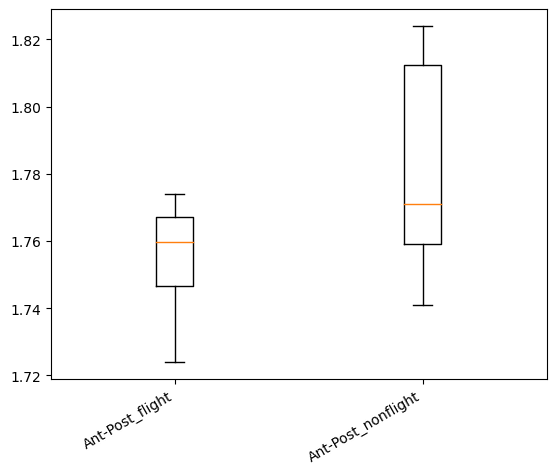

field:  Ant-Post.1
excluding samples:  []
{'Ant-Post.1': {'t-test p-value': 0.49605, 'wilcoxon p-value': 0.61038, 'ks-test p-value': 0.83636}}
n flight =  4
n nonflight =  8


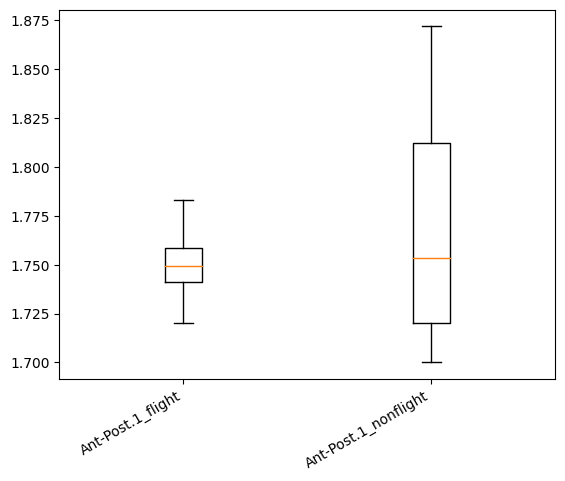

In [ ]:
# plot a box plot and get stats for the Ant-Post field of the micro CT data for ground and spaceflight samples
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Ant-Post', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Ant-Post.1', treatment='Treatment', space='Flight', exclude_samples=[])

### **Anterior-Posterior Measurement with Vivarium Samples Excluded from "NonFlight"**

field:  Ant-Post
excluding samples:  ['V10', 'V12', 'V13', 'V14']
{'Ant-Post': {'t-test p-value': 0.08225, 'wilcoxon p-value': 0.11235, 'ks-test p-value': 0.77143}}
n flight =  4
n nonflight =  4


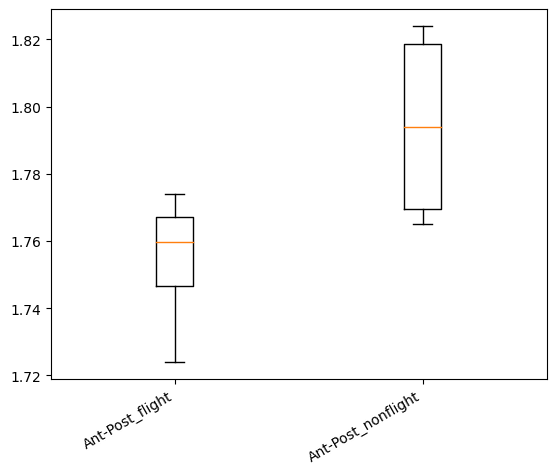

field:  Ant-Post.1
excluding samples:  ['V10', 'V12', 'V13', 'V14']
{'Ant-Post.1': {'t-test p-value': 0.14884, 'wilcoxon p-value': 0.14891, 'ks-test p-value': 0.22857}}
n flight =  4
n nonflight =  4


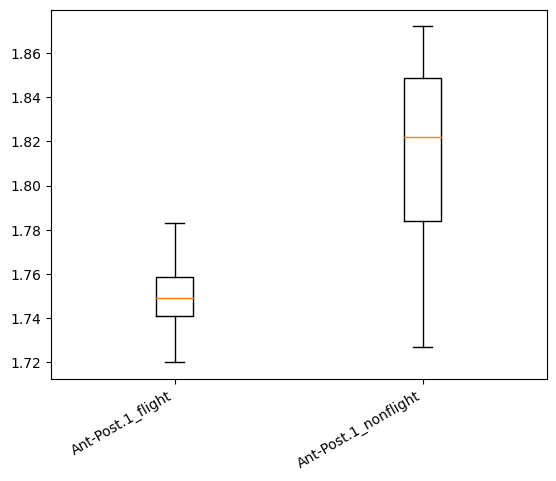

In [ ]:
exclude_list=list(data['microCT'][data['microCT']['Treatment'] == 'Vivarium']['Source Name'])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Ant-Post', treatment='Treatment', space='Flight', exclude_samples=exclude_list)
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Ant-Post.1', treatment='Treatment', space='Flight', exclude_samples=exclude_list)

### **Superior-Inferior Measurement**

field:  Sup-Inf
excluding samples:  []
{'Sup-Inf': {'t-test p-value': 0.52282, 'wilcoxon p-value': 0.49691, 'ks-test p-value': 0.51313}}
n flight =  4
n nonflight =  8


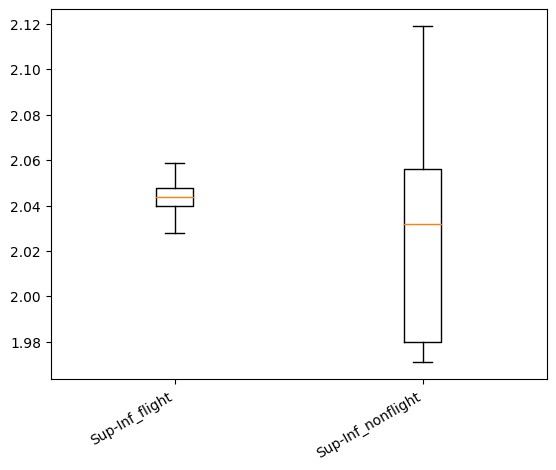

In [ ]:
# plot a box plot for the Sup-Inf field of the micro CT data for ground and spaceflight samples (note there is no Sup-Inf.1 measurement)
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Sup-Inf', treatment='Treatment', space='Flight', exclude_samples=[])

### **Superior-Inferior Measurement with Vivarium Samples Excluded from "Nonflight"**

field:  Sup-Inf
excluding samples:  ['V10', 'V12', 'V13', 'V14']
{'Sup-Inf': {'t-test p-value': 0.26553, 'wilcoxon p-value': 0.24821, 'ks-test p-value': 0.77143}}
n flight =  4
n nonflight =  4


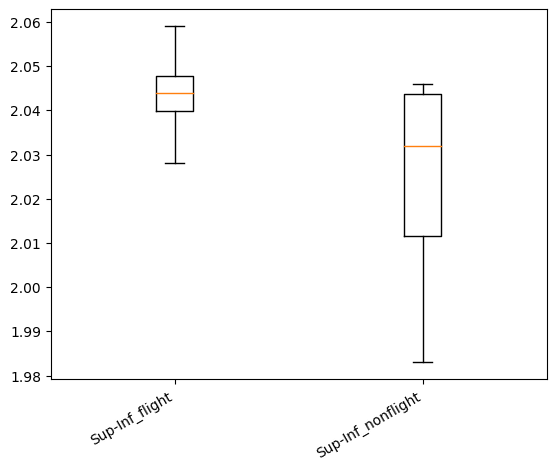

In [ ]:
exclude_list=list(data['microCT'][data['microCT']['Treatment'] == 'Vivarium']['Source Name'])
m.plotbox_and_stats(data_=data['microCT'],  sample_key = 'Source Name', field='Sup-Inf', treatment='Treatment', space='Flight', exclude_samples=exclude_list)

### **Retina Measurement**

The `Retina` field is the measurement for the left eye, and the `Retina.1` field is the measurement for the right eye.

field:  Retina
excluding samples:  []
{'Retina': {'t-test p-value': 0.00796, 'wilcoxon p-value': 0.01742, 'ks-test p-value': 0.08485}}
n flight =  4
n nonflight =  8


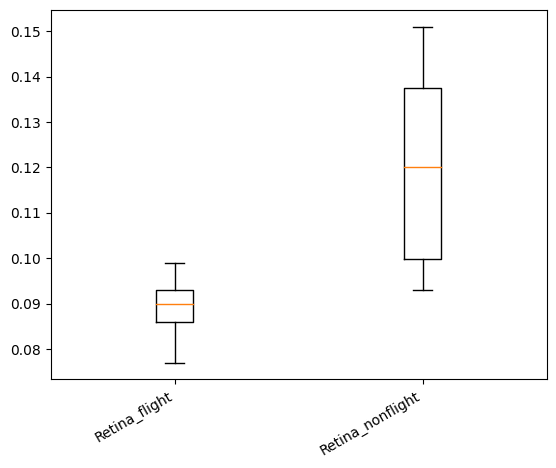

field:  Retina.1
excluding samples:  []
{'Retina.1': {'t-test p-value': 0.82328, 'wilcoxon p-value': 0.7341, 'ks-test p-value': 0.83636}}
n flight =  4
n nonflight =  8


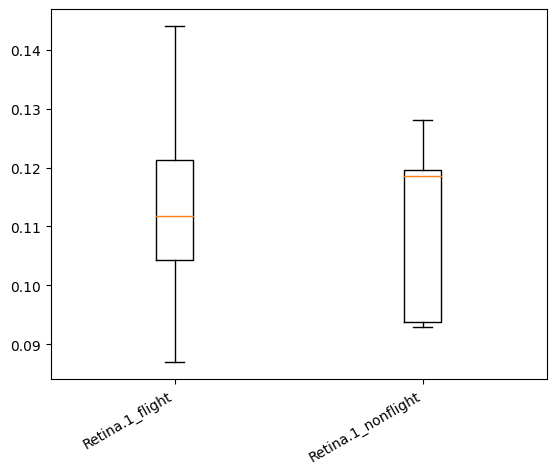

In [ ]:
# plot a box plot for the Retina field of the micro CT data for ground and spaceflight samples
m.plotbox_and_stats(data_=data['microCT'],  sample_key = 'Source Name', field='Retina', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'],  sample_key = 'Source Name', field='Retina.1', treatment='Treatment', space='Flight', exclude_samples=[])

### **Retina Measurement with Vivarium Samples Excluded from "Nonflight"**

**YOUR TURN**

Use the preceding code examples to fill in the TODO's in the cells below.

In [ ]:
# TODO create an exclude_list which excludes Vivarium samples

# TODO plot boxplot and statistics for the Retina field, excluding Vivarium samples

# TODO plot boxplot and statistics for the Retina.1 field, excluding Vivarium samples


### **Pigment layer Measurement**

The `Pigment Layer` field is the measurement for the left eye, and the `Pigmen Layer.1` field is the measurement for the right eye.

field:  Pigment Layer
excluding samples:  []
{'Pigment Layer': {'t-test p-value': 0.01535, 'wilcoxon p-value': 0.00847, 'ks-test p-value': 0.0202}}
n flight =  4
n nonflight =  8


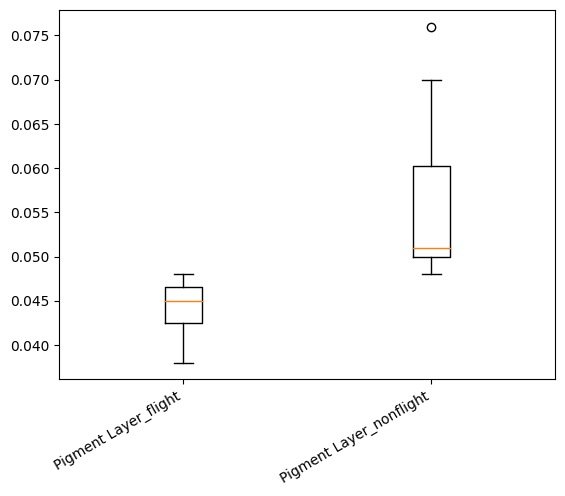

field:  Pigment Layer.1
excluding samples:  []
{'Pigment Layer.1': {'t-test p-value': 0.98999, 'wilcoxon p-value': 1.0, 'ks-test p-value': 0.99798}}
n flight =  4
n nonflight =  8


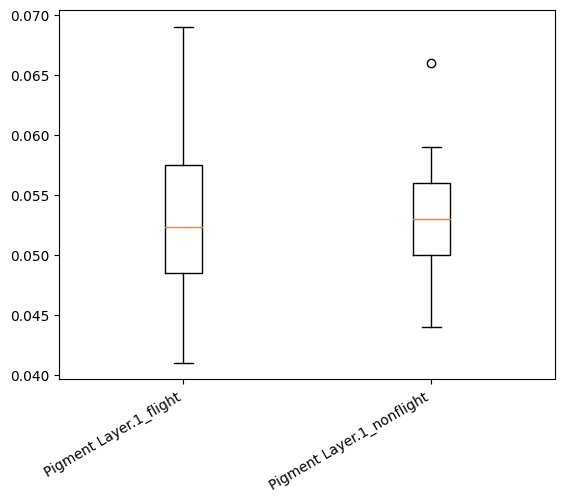

In [ ]:
# plot a box plot for the Pigment Layer field of the micro CT data for ground and spaceflight samples
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Pigment Layer', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Pigment Layer.1', treatment='Treatment', space='Flight', exclude_samples=[])


### **Pigment Layer Measurement with Vivarium Samples Excluded from "Nonflight"**

**YOUR TURN**

Use the preceding code examples to fill in the TODO's in the cells below.

In [ ]:
# TODO create an exclude_list for Vivarium samples

# TODO plot the boxplot and statistics for the Pigment Layer excluding Vivarium samples

# TODO plot the boxplot and statistics for the Pigment Layer.1 excluding Vivarium samples


### **Choroid Measurement**

The `Choroid` field is the measurement for the left eye, and the `Choroid.1` field is the measurement for the right eye.

field:  Choroid
excluding samples:  []
{'Choroid': {'t-test p-value': 0.01249, 'wilcoxon p-value': 0.00658, 'ks-test p-value': 0.00404}}
n flight =  4
n nonflight =  8


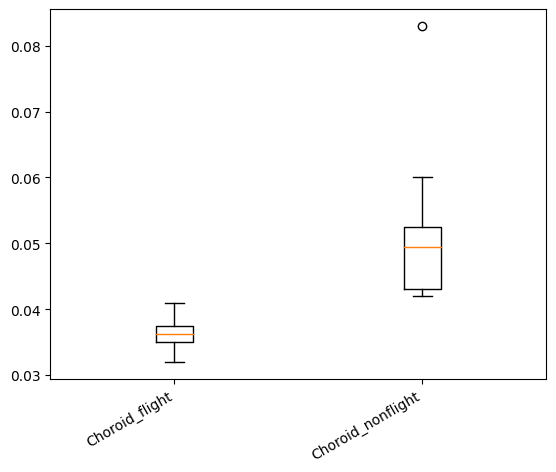

field:  Choroid.1
excluding samples:  []
{'Choroid.1': {'t-test p-value': 0.00862, 'wilcoxon p-value': 0.01742, 'ks-test p-value': 0.08485}}
n flight =  4
n nonflight =  8


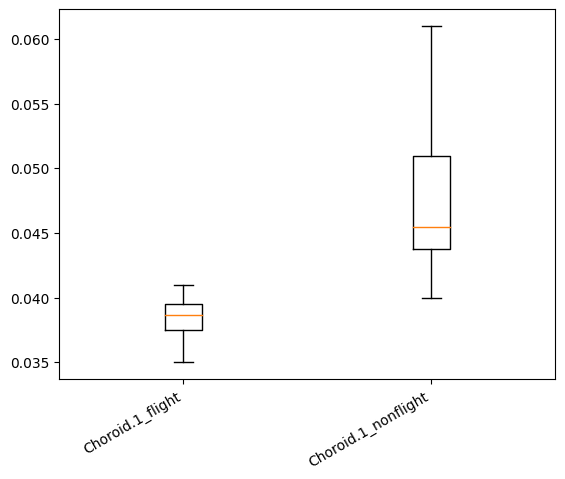

In [ ]:
# plot a box plot for the Choroid field of the micro CT data for ground and spaceflight samples
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Choroid', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Choroid.1', treatment='Treatment', space='Flight', exclude_samples=[])



### **Choroid Measurement with Vivarium Samples Excluded from "Nonflight"**

**YOUR TURN**

Use the preceding code examples to fill in the TODO's in the cells below.

In [ ]:
# TODO create an exclude_list for Vivarium samples

# TODO plot the boxplot and statistics for the Choroid excluding Vivarium samples

# TODO plot the boxplot and statistics for the Choroid.1 excluding Vivarium samples

### **Sclera Measurement**

The `Sclera` field is the measurement for the left eye, and the `Sclera.1` field is the measurement for the right eye.

field:  Sclera
excluding samples:  []
{'Sclera': {'t-test p-value': 0.0026, 'wilcoxon p-value': 0.01085, 'ks-test p-value': 0.08485}}
n flight =  4
n nonflight =  8


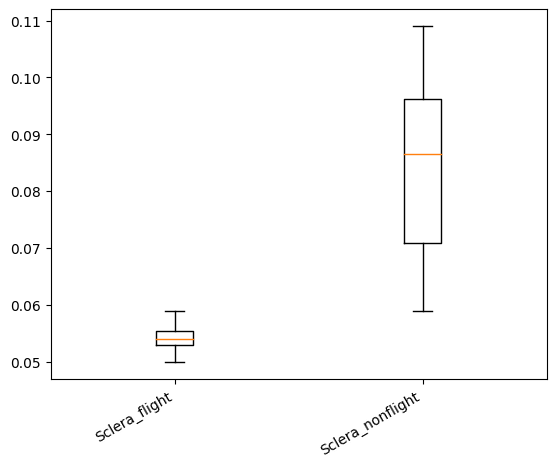

field:  Sclera.1
excluding samples:  []
{'Sclera.1': {'t-test p-value': 0.18301, 'wilcoxon p-value': 0.12637, 'ks-test p-value': 0.51313}}
n flight =  4
n nonflight =  8


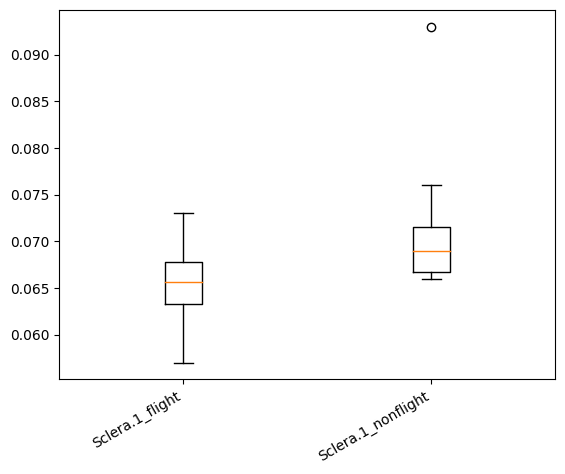

In [ ]:
# plot a box plot for the Sclera field of the micro CT data for ground and spaceflight samples
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Sclera', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Sclera.1', treatment='Treatment', space='Flight', exclude_samples=[])

### **Sclera Measurement with Vivarium Samples Excluded from "Nonflight"**

**YOUR TURN**

Use the preceding code examples to fill in the TODO's in the cells below.

In [ ]:
# TODO create an exclude_list for Vivarium samples

# TODO plot the boxplot and statistics for the Sclera excluding Vivarium samples

# TODO plot the boxplot and statistics for the Sclera.1 excluding Vivarium samples

**QUESTIONS**

1. Which measurements had a statistically significant difference in distribution between flight and ground samples for all 3 tests?

2. Based on the statistical tests we did on the microCT data, which measurement seems to have the most prominent distinction between space flight and ground samples?

3. What are reasons to include or exclude samples from the Vivarium treatment?

**Double click here to enter your answers to the questions in this text box.**

1.

2.

3.

## **Explore the Immunostaining Microscopy from OSD-557**

Next, we will explore the *immunostaining microscopy* data from OSD-557.

[Immunostaining microscopy](https://en.wikipedia.org/wiki/Immunostaining) helps scientists find specific proteins in cells using colored stains that mark the proteins of interest.

### **Explore the immunostaining HNE data**

HNE or hydroxynonenal is a colorless oil that is produced by lipid oxidation.  It is found in animal tissues in higher quantities during oxidative stress.  It is considered a possible causal agent of numerous diseases including chronic inflammation, neurodegenerative disorders, and cancer.

https://en.wikipedia.org/wiki/4-Hydroxynonenal

Spaceflight causes photoreceptor degradation and oxidative stress. Immunofluorescence staining for PNA, a marker for cone photoreceptors (green), and HNE, a marker for oxidative stress (red), in the photoreceptor layer.

![](https://www.researchgate.net/publication/335843406/figure/fig4/AS:803925871587329@1568682272612/Spaceflight-causes-photoreceptor-degradation-and-oxidative-stress-A-Immunofluorescence.ppm)


For each section on the retina slide, they selected 5 areas for counting.  These 5 areas were used subsequently in their quantitative analysis.

`sumcount`: total HNE positive cells in these five regions.

`sumEC`: total HNE positive endothelial cells in the same five regions.

`sunarea`: total areas for these five regions.

`dentotal`: HNE positive cell density.

`denEC`: HNE positive Endothelial cell density.

In [ ]:
# read in the HNE data
data['immunoHNE'] = m.read_phenotype_data('557', 'LSDS-1_immunostaining_microscopy_HNEtr_Transformed_Reusable_Results')
print('num records: ', len(data['immunoHNE']))
print('sample names: ', list(data['immunoHNE']['Sample Name']))
data['immunoHNE'].head()

num records:  23
sample names:  ['F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'GC15_Mouse_Eye', 'GC16_Mouse_Eye', 'GC17_Mouse_Eye', 'GC18_Mouse_Eye', 'GC19_Mouse_Eye', 'Viv15_Mouse_Eye', 'Viv16_Mouse_Eye', 'Viv17_Mouse_Eye', 'Viv18_Mouse_Eye', 'Viv19_Mouse_Eye', 'Viv20_Mouse_Eye', 'CC2_15_Mouse_Eye', 'CC2_16_Mouse_Eye', 'CC2_17_Mouse_Eye', 'CC2_18_Mouse_Eye', 'CC2_19_Mouse_Eye', 'CC2_20_Mouse_Eye']


,Source Name,Sample Name,sumcount,sumEC,sunarea,dentotal,denEC
0,F15,F15_Mouse_Eye,124,24,1.149408,107.881593,20.880308
1,F16,F16_Mouse_Eye,97,28,0.946872,102.442566,29.571050
2,F17,F17_Mouse_Eye,159,28,0.875718,181.565290,31.973762
3,F18,F18_Mouse_Eye,90,23,0.650403,138.375660,35.362669
4,F19,F19_Mouse_Eye,106,15,1.086317,97.577417,13.808125


*We will examine differences between the ground and spaceflight samples for the distribution of data in the sumcount, sumeEC, sunarea, dentotal, and denEC columns.*

field:  sumcount
excluding samples:  []
{'sumcount': {'t-test p-value': 0.00523, 'wilcoxon p-value': 0.00078, 'ks-test p-value': 0.00014}}
n flight =  6
n nonflight =  17


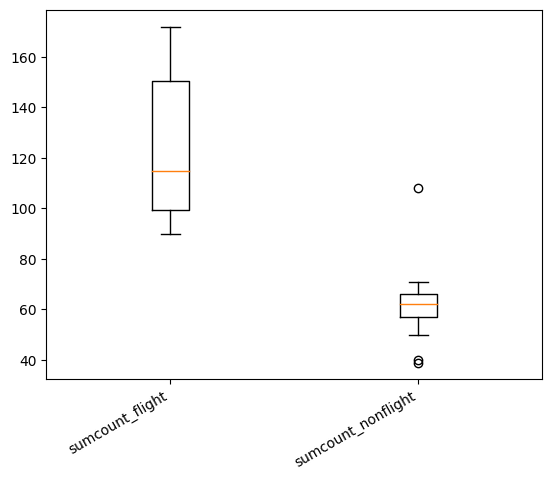

field:  sumcount
excluding samples:  ['CC2_15', 'CC2_16', 'CC2_17', 'CC2_18', 'CC2_19', 'CC2_20']
{'sumcount': {'t-test p-value': 0.00393, 'wilcoxon p-value': 0.00091, 'ks-test p-value': 0.00016}}
n flight =  6
n nonflight =  11


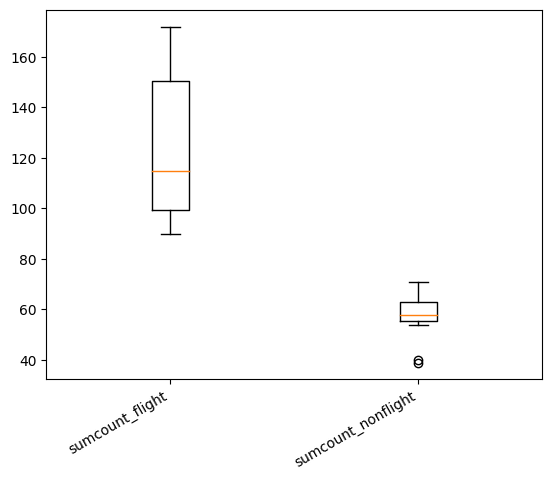

In [ ]:
# plot a box plot for the sumcount field of the immuno HNE data for ground and spaceflight samples
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='sumcount', treatment=None, space=None, exclude_samples=[])
exclude_list=m.exclude_samples_by_prefix(data['immunoHNE'], prefix="CC", colname="Source Name")
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='sumcount', treatment=None, space=None, exclude_samples=exclude_list)


field:  sumEC
excluding samples:  []
{'sumEC': {'t-test p-value': 0.01954, 'wilcoxon p-value': 0.019, 'ks-test p-value': 0.00957}}
n flight =  6
n nonflight =  17


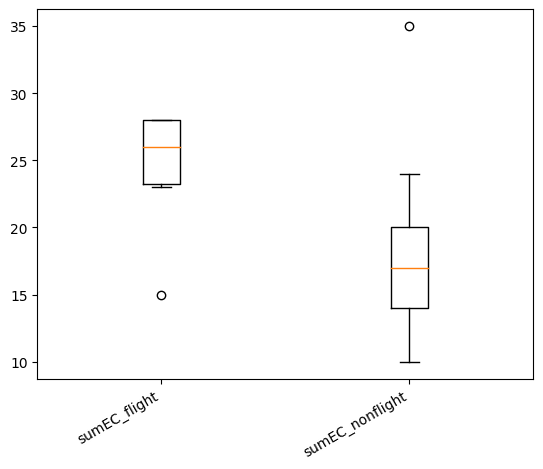

field:  sumEC
excluding samples:  ['CC2_15', 'CC2_16', 'CC2_17', 'CC2_18', 'CC2_19', 'CC2_20']
{'sumEC': {'t-test p-value': 0.01055, 'wilcoxon p-value': 0.0138, 'ks-test p-value': 0.01325}}
n flight =  6
n nonflight =  11


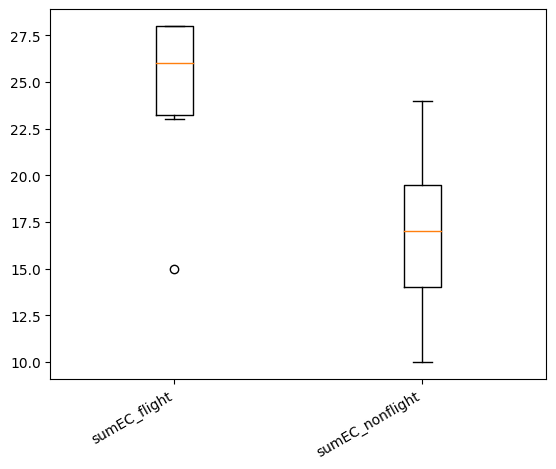

In [ ]:
# plot a box plot for the sumEC field of the immuno HNE data for ground and spaceflight samples
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='sumEC', treatment=None, space=None, exclude_samples=[])
exclude_list=m.exclude_samples_by_prefix(data['immunoHNE'], prefix="CC", colname="Source Name")
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='sumEC', treatment=None, space=None, exclude_samples=exclude_list)

field:  sunarea
excluding samples:  []
{'sunarea': {'t-test p-value': 0.21505, 'wilcoxon p-value': 0.20758, 'ks-test p-value': 0.4962}}
n flight =  6
n nonflight =  17


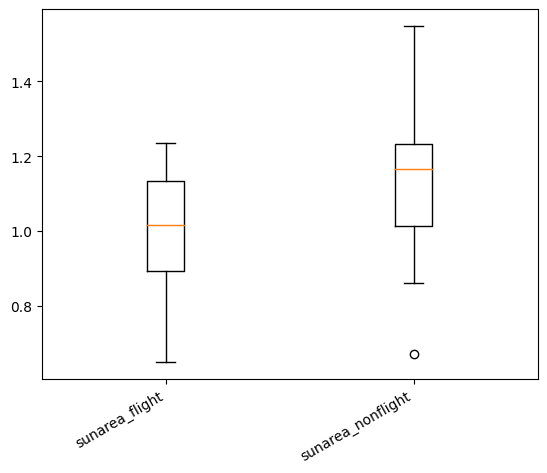

field:  sunarea
excluding samples:  ['CC2_15', 'CC2_16', 'CC2_17', 'CC2_18', 'CC2_19', 'CC2_20', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20']
{'sunarea': {'t-test p-value': 0.40299, 'wilcoxon p-value': 0.36131, 'ks-test p-value': 0.81818}}
n flight =  6
n nonflight =  5


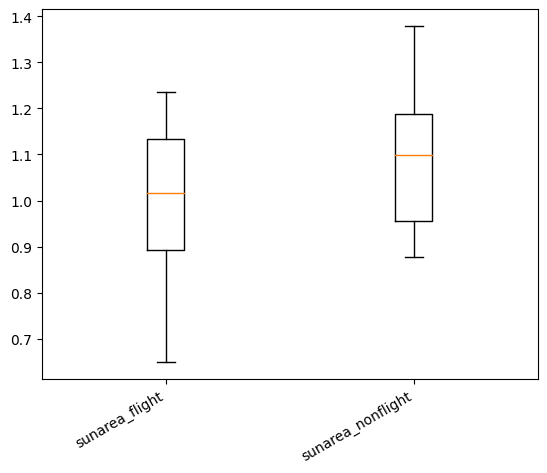

In [ ]:
# plot a box plot for the sunarea field of the immuno HNE data for ground and spaceflight samples
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='sunarea', treatment=None, space=None, exclude_samples=[])
exclude_list=m.exclude_samples_by_prefix(data['immunoHNE'], prefix="CC", colname="Source Name") + m.exclude_samples_by_prefix(data['immunoHNE'], prefix="V", colname="Source Name")
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='sunarea', treatment=None, space=None, exclude_samples=exclude_list)


field:  dentotal
excluding samples:  []
{'dentotal': {'t-test p-value': 0.00218, 'wilcoxon p-value': 0.00036, 'ks-test p-value': 2e-05}}
n flight =  6
n nonflight =  17


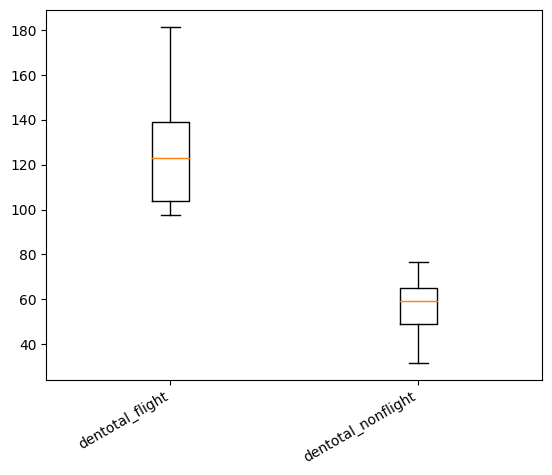

field:  dentotal
excluding samples:  ['CC2_15', 'CC2_16', 'CC2_17', 'CC2_18', 'CC2_19', 'CC2_20']
{'dentotal': {'t-test p-value': 0.00144, 'wilcoxon p-value': 0.00091, 'ks-test p-value': 0.00016}}
n flight =  6
n nonflight =  11


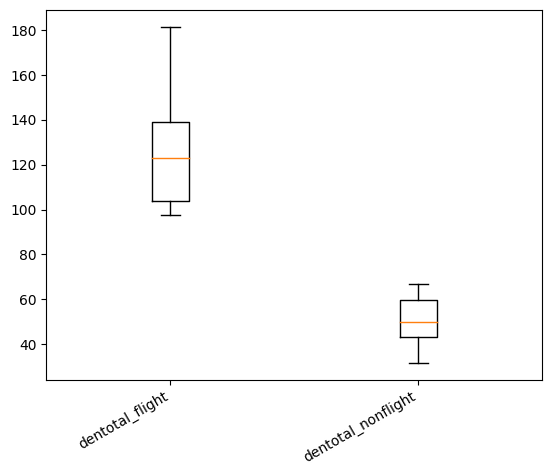

In [ ]:
# plot a box plot for the dentotal field of the immuno HNE data for ground and spaceflight samples
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='dentotal', treatment=None, space=None, exclude_samples=[])
exclude_list=m.exclude_samples_by_prefix(data['immunoHNE'], prefix="CC", colname="Source Name")
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='dentotal', treatment=None, space=None, exclude_samples=exclude_list)

field:  denEC
excluding samples:  []
{'denEC': {'t-test p-value': 0.0262, 'wilcoxon p-value': 0.00958, 'ks-test p-value': 0.02449}}
n flight =  6
n nonflight =  17


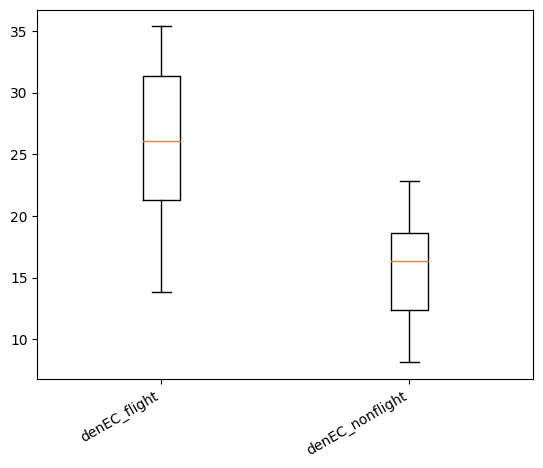

field:  denEC
excluding samples:  ['CC2_15', 'CC2_16', 'CC2_17', 'CC2_18', 'CC2_19', 'CC2_20']
{'denEC': {'t-test p-value': 0.01846, 'wilcoxon p-value': 0.01198, 'ks-test p-value': 0.04783}}
n flight =  6
n nonflight =  11


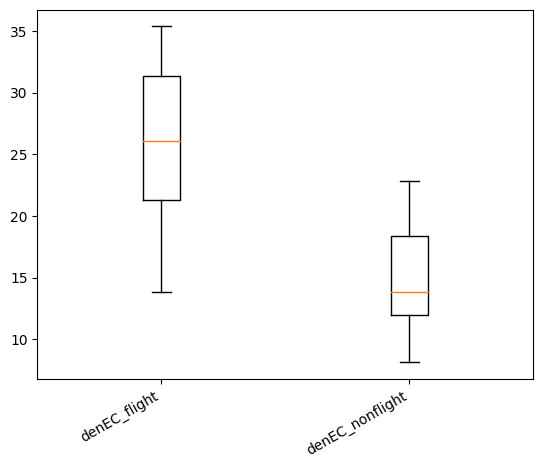

In [ ]:
# plot a box plot for the denEC field of the immuno HNE data for ground and spaceflight samples
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='denEC', treatment=None, space=None, exclude_samples=[])
exclude_list=m.exclude_samples_by_prefix(data['immunoHNE'], prefix="CC", colname="Source Name")
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='denEC', treatment=None, space=None, exclude_samples=exclude_list)


**QUESTIONS**

1. Which metric seems to have the highest sensitivity to removing the CC samples?

2. Which metric and collection of data has the lowest p-values?

3. Which metric is the best choice for use in building a machine learning model?



Double click here to enter your answers to the questions above.

1.

2.

3.

### **Explore the immunostaining microscopy PNA data**

**What is immunostaining PNA?**

Peanut agglutinin (PNA) is plant lectin protein derived from the fruits of Arachis hypogaea.  Lectins recognise and bind particular sugar sequences in carbohydrates. The name "peanut agglutinin" originates from its ability to stick together (agglutinate) cells.  In the context of this experiment, PNA is a specific marker for cone photoreceptors and can be used to detect signs of degradation.

https://en.wikipedia.org/wiki/Peanut_agglutinin



![](https://www.mdpi.com/ijms/ijms-24-07362/article_deploy/html/images/ijms-24-07362-g009-550.jpg)

Quantification of apoptosis based on terminal deoxynucleotidyltransferase dUTP nick-end label (TUNEL) staining of flight (FLT) and ground control (GC) mouse retina. (a) TUNEL-positive cells were identified with green fluorescence and the endothelium was stained with lectin in red. TUNEL-positive cells that were laid within red lectin-labeled endothelium were identified as TUNEL-positive endothelial cells. The nuclei of photoreceptors were counterstained with DAPI (blue). Scale bar = 50 μm. (b) Apoptotic cell density in the retinal outer nuclear layer (ONL), inner nuclear layer (INL), and the ganglion cell layer (GCL) of the FLT and the GC mice. (c) Apoptotic cell density in the retinal endothelium of the FLT and GC groups. Values are represented as the mean density ± SEM (n = 5). The density profiles were expressed as the mean number of apoptotic-positive cells/mm2. Measurements across five retinal sections per eye were used as a single experimental value. Strong trend differences between FLT saline vs. GC saline (p = 0.058), and FLT BuOE vs. GC BuOE (p = 0.056).

https://www.mdpi.com/1422-0067/24/8/7362

**YOUR TURN**

Use the preceding code examples to fill in the TODO's in the cells below.

In [ ]:
# TODO: Navigate to the Files section of https://osdr.nasa.gov/bio/repo/data/studies/OSD-557

# TODO: Find the reusable transformed files for PNA immunostaining microscopy

# TODO: uncomment and complete the following command to read in the PNA microscopy data from OSDR-557

# data['immunoPNA'] =

# TODO: print the number of records in the PNA microscopy data set


# TODO: print the list of samples in the PNA microscopy data set


# TODO: print the head of the dataframe of the PNA microscopy data set


*We will examine all the relevant fields (totct, totarea, density, and Average HNE Fluorescent Intensity) to determine if there is a statistically significant difference in the distributions of those data between ground and spaceflight samples.*

In [ ]:
# TODO: plot a box plot of the distributions of totarea for flight and ground samples


In [ ]:
# TODO: plot a box plot of the distributions of density for flight and ground samples


In [ ]:
# TODO: plot a box plot of the distributions of Average HNE Fluorescent Intensity for flight and ground samples


**QUESTIONS**

1. What do you think the totct, totarea, and density fields refer to in the table?

2. How might the Average HNE Fluorescent Intensity value be measured?

3. Which metric has the most significant distinction between flight and non-flight samples?


**Double click here to enter your answers to the questions above.**

1.

2.

3.

# **OSD-568 Data Exploration**

The [OSD-568 dataset](https://osdr.nasa.gov/bio/repo/data/studies/OSD-568) contains 3 different assays of microscopy imaging data: one for ZO, one PECAM, and one for TUNEL assays, each of which are described below.

[Zonnula occludens](https://en.wikipedia.org/wiki/Tight_junction) (ZO) are scaffolding proteins that create seals to prevent leakage of solutes and water between cells.

[Terminal deoxynucleotidyl transferase dUTP nick end labeling](https://en.wikipedia.org/wiki/TUNEL_assay) (TUNEL) is an assay that that detects apoptotic cells undergoing extensive DNA degredation.  

[Platelet endothelial cell adhesion molecule](https://en.wikipedia.org/wiki/CD31) (PECAM) is a protein that functions as an adhesive stress-response to both maintain cell junctional integrity and speed
 restoration of vascular permeability.

 Immunohistochemical analysis of the retina revealed that an increased expression of aquaporin-4 (AQP-4) in the flight mice compared to controls gave strong indication of disturbance of BRB integrity. There were also a significant increase in the expression of platelet endothelial cell adhesion molecule-1 (PECAM-1) and a decrease in the expression of the BRB-related tight junction protein, Zonula occludens-1 (ZO-1). Proteomic analysis showed that many key proteins and pathways responsible for cell death, cell cycle, immune response, mitochondrial function and metabolic stress were significantly altered in the flight mice compared to ground control animals. These data indicate a complex cellular response that may alter retina structure and BRB integrity following long-term spaceflight.






## **Explore the ZO microscopy data**

In [ ]:
# read in data for OSD-568 (LSDS-5_immunostaining_microscopy_Zo-1tr TRANSFORMED.csv)
data['immunoMICRO-Zo'] = m.read_phenotype_data('568', 'LSDS-5_immunostaining_microscopy_Zo-1tr_TRANSFORMED')
print('number of samples: ', len(list(data['immunoMICRO-Zo']['Sample_Name'])))
print('samples: ', list(data['immunoMICRO-Zo']['Sample_Name']))
data['immunoMICRO-Zo'].head()

number of samples:  12
samples:  ['F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'GC15_Mouse_Eye', 'GC16_Mouse_Eye', 'Gc17_Mouse_Eye', 'GC18_Mouse_Eye', 'GC19_Mouse_Eye', 'GC20_Mouse_Eye']


,Sample_Name,Average
0,F15_Mouse_Eye,34.8614
1,F16_Mouse_Eye,40.8302
2,F17_Mouse_Eye,33.1048
3,F18_Mouse_Eye,22.5834
4,F19_Mouse_Eye,31.9374


field:  Average
excluding samples:  []
{'Average': {'t-test p-value': 0.1276, 'wilcoxon p-value': 0.20018, 'ks-test p-value': 0.93074}}
n flight =  6
n nonflight =  6


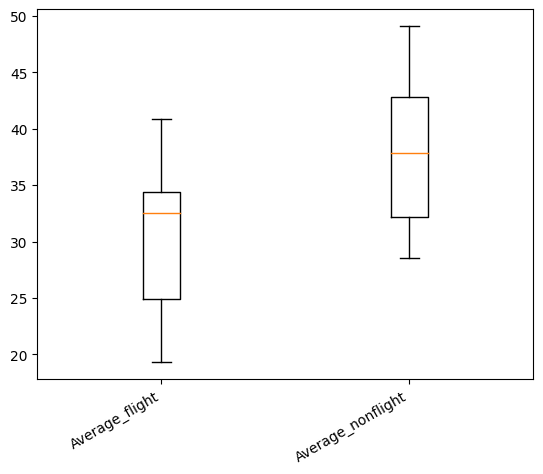

In [ ]:
# plot box plot of immunostaining microscopy Zo-1tr Average field for flight and non-flight samples
m.plotbox_and_stats(data_=data['immunoMICRO-Zo'], sample_key = 'Sample_Name', field='Average', treatment=None, space=None, exclude_samples=[])

## **Explore the TUNEL microscopy data**

In [ ]:
# read in data for OSD-568 (LSDS-5_immunostaining_microscopy_TUNELtr TRANSFORMED.csv)
data['immunoMICRO-TUNEL'] = m.read_phenotype_data('568', 'LSDS-5_immunostaining_microscopy_TUNELtr_TRANSFORMED')
print('number of samples: ', len(list(data['immunoMICRO-TUNEL']['Sample_Name'])))
print('samples: ', list(data['immunoMICRO-TUNEL']['Sample_Name']))
data['immunoMICRO-TUNEL'].head()

number of samples:  23
samples:  ['F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'GC15_Mouse_Eye', 'GC16_Mouse_Eye', 'GC17_Mouse_Eye', 'GC18_Mouse_Eye', 'GC19_Mouse_Eye', 'GC20_Mouse_Eye', 'VG15_Mouse_Eye', 'VG16_Mouse_Eye', 'VG17_Mouse_Eye', 'VG18_Mouse_Eye', 'VG20_Mouse_Eye', 'V15_Mouse_Eye', 'V16_Mouse_Eye', 'V17_Mouse_Eye', 'V18_Mouse_Eye', 'V19_Mouse_Eye', 'V20_Mouse_Eye']


,Sample_Name,Total,Total_EC,Total_Area,Density,Density_EC
0,F15_Mouse_Eye,193,76,1.127330,171.200986,67.415932
1,F16_Mouse_Eye,174,70,1.054249,165.046336,66.397951
2,F17_Mouse_Eye,170,61,1.074499,158.213281,56.770648
3,F18_Mouse_Eye,166,39,1.173785,141.422795,33.225837
4,F19_Mouse_Eye,151,32,1.051339,143.626361,30.437374


field:  Density_EC
excluding samples:  []
{'Density_EC': {'t-test p-value': 0.01726, 'wilcoxon p-value': 0.00328, 'ks-test p-value': 0.01415}}
n flight =  6
n nonflight =  17


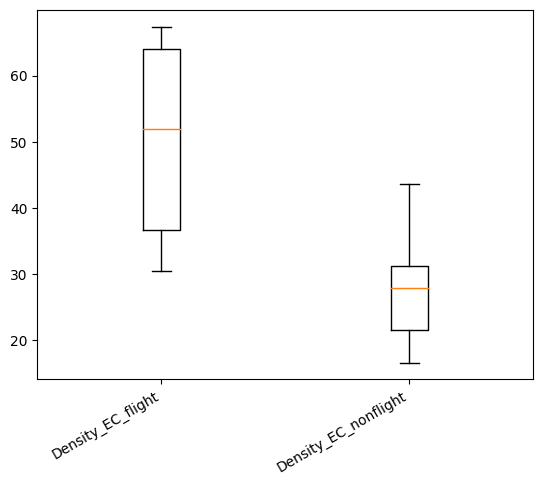

field:  Density_EC
excluding samples:  ['VG15_Mouse_Eye', 'VG16_Mouse_Eye', 'VG17_Mouse_Eye', 'VG18_Mouse_Eye', 'VG20_Mouse_Eye', 'V15_Mouse_Eye', 'V16_Mouse_Eye', 'V17_Mouse_Eye', 'V18_Mouse_Eye', 'V19_Mouse_Eye', 'V20_Mouse_Eye']
{'Density_EC': {'t-test p-value': 0.04231, 'wilcoxon p-value': 0.05466, 'ks-test p-value': 0.14286}}
n flight =  6
n nonflight =  6


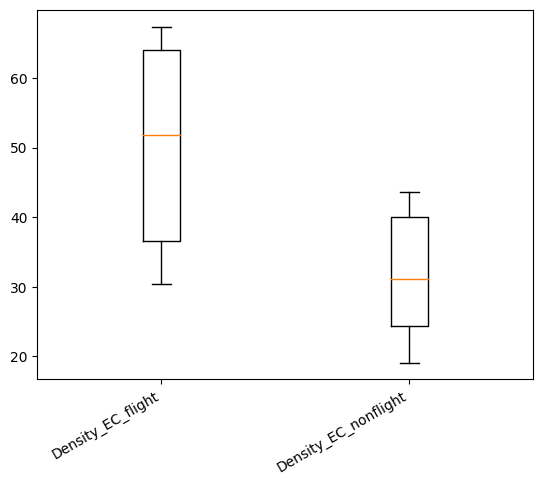

In [ ]:
# plot box plot of immunostaining microscopy TUNEL Density_EC field for flight and non-flight ssamples
m.plotbox_and_stats(data_=data['immunoMICRO-TUNEL'], sample_key = 'Sample_Name', field='Density_EC', treatment=None, space=None, exclude_samples=[])
exclude_list=m.exclude_samples_by_prefix(data['immunoMICRO-TUNEL'], prefix="V", colname="Sample_Name")
m.plotbox_and_stats(data_=data['immunoMICRO-TUNEL'], sample_key = 'Sample_Name', field='Density_EC', treatment=None, space=None, exclude_samples=exclude_list)

## **Explore the PECAM data**

In [ ]:
# read in data for OSD-568 (LSDS-5_immunostaining_microscopy_PECAMtr TRANSFORMED.csv)
data['immunoMICRO-PECAM'] = m.read_phenotype_data('568', 'LSDS-5_immunostaining_microscopy_PECAMtr_TRANSFORMED')
print('number of samples: ', len(list(data['immunoMICRO-PECAM']['Sample_Name'])))
print('samples: ', list(data['immunoMICRO-PECAM']['Sample_Name']))
data['immunoMICRO-PECAM'].head()

number of samples:  11
samples:  ['F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'GC15_Mouse_Eye', 'GC16_Mouse_Eye', 'GC17_Mouse_Eye', 'GC18_Mouse_Eye', 'GC19_Mouse_Eye']


,Sample_Name,Average
0,F15_Mouse_Eye,45.0098
1,F16_Mouse_Eye,53.9888
2,F17_Mouse_Eye,37.0548
3,F18_Mouse_Eye,67.0988
4,F19_Mouse_Eye,49.7456


field:  Average
excluding samples:  []
{'Average': {'t-test p-value': 0.02146, 'wilcoxon p-value': 0.02846, 'ks-test p-value': 0.02597}}
n flight =  6
n nonflight =  5


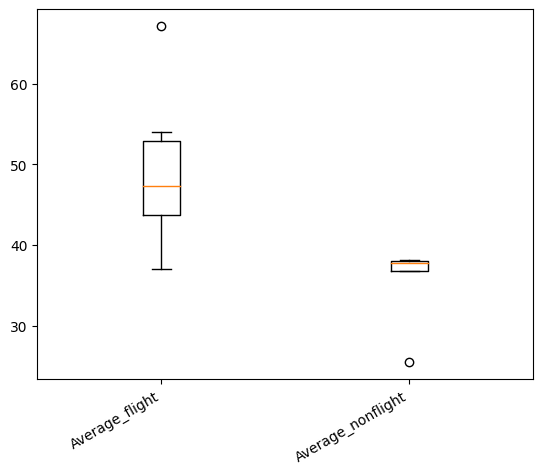

In [ ]:
# plot box plot of immunostaining microscopy PECAM Average field for flight and non-flight ssamples
m.plotbox_and_stats(data_=data['immunoMICRO-PECAM'], sample_key = 'Sample_Name', field='Average', treatment=None, space=None, exclude_samples=[])

**QUESTIONS**

1. How many samples have measurements for immunostaining microscopy Zo-1tr? For immunostaining microscopy TUNELtr? For immunostaining microscopy PECAMtr?

2. Which datasets have the largest distinction (smallest p-values) between flight and non-flight samples?

3. What does it mean if a set of samples (either spaceflight or ground control) has, on average, higher values for ZO? For TUNEL? For PECAM?

**Double click here to enter your answers to the questions above.**

1.

2.

3.

# **OSD-583 Data Exploration**

[The OSD-583 dataset ](https://osdr.nasa.gov/bio/repo/data/studies/OSD-583) provides measurements for [intra-ocular pressure](https://en.wikipedia.org/wiki/Intraocular_pressure) (IOP).
Within 38 +/− 4 hours of splashdown, mice were euthanized and ocular tissues were collected for analysis. Ground control (GC) and vivarium control mice were maintained on Earth in flight hardware or normal vivarium cages respectively. Repeated intraocular pressure (IOP) measurements were performed before the flight launch and re-measured before the mice were euthanized after splashdown. Measurements of IOP using the rebound tonometer appeared to be well tolerated by the mice. The animals exhibited no signs of irritation or discomfort during the procedure. Five-6 sequential measurements were made to obtain an average of the counts as a single IOP readout for each mouse. This process was repeated three times for each eye.

IOP was significantly lower in post-flight measurements compared to that of pre-flight (14.4–19.3 mmHg vs 16.3–20.3 mmHg) (p < 0.05) for the left eye.
 IOP was significantly lower in post-flight measurements compared to that of pre-flight (14.4–19.3 mmHg vs 16.3–20.3 mmHg) (p less than 0.05) for the left eye.



**What is tonometry?**

Tonometry is the procedure eye care professionals perform to determine the intraocular pressure (IOP), the fluid pressure inside the eye. It is an important test in the evaluation of patients at risk from glaucoma.Most tonometers are calibrated to measure pressure in millimeters of mercury (mmHg), with the normal eye pressure range between 10 and 21 mmHg (13–28 hPa).

Rebound tonometers determine intraocular pressure by bouncing a small plastic tipped metal probe against the cornea. The device uses an induction coil to magnetise the probe and fire it against the cornea. As the probe bounces against the cornea and back into the device, it creates an induction current from which the intraocular pressure is calculated. The device is simple and easy to use and self-use versions are available. It is portable, does not require the use of eye drops and is particularly suitable for children and non-cooperative patients.

https://en.wikipedia.org/wiki/Ocular_tonometry


![](https://www.phenogenomics.cz/files/2021/08/picture-2.jpg)

**What is transformed tonometry data?**

To enable maximal data reuse (for machine-readable approaches), the submitted version of this dataset was subsequently transformed and edited to be aligned with a intraocular pressure data reuse template, which was created through feedback provided by subject matter experts in the ALSDA Analysis Working Group. This transformed reusable version is structured so all results are standardized into specific rows (source/subject) and columns (measures). This enables all intraocular pressure results to be identically structured for efficient data mining.

In [ ]:
# read in tonometry transformed data
data['iop'] = m.read_phenotype_data('583', 'LSDS-16_tonometry_maoTRANSFORMED')
print('num samples: ', str(len(list(data['iop']['Sample Name']))))
print('samples: ', list(data['iop']['Sample Name']))
data['iop'].head()

num samples:  100
samples:  ['F1_Mouse_Eye', 'F2_Mouse_Eye', 'F3_Mouse_Eye', 'F4_Mouse_Eye', 'F5_Mouse_Eye', 'F6_Mouse_Eye', 'F7_Mouse_Eye', 'F8_Mouse_Eye', 'F9_Mouse_Eye', 'F10_Mouse_Eye', 'F11_Mouse_Eye', 'F12_Mouse_Eye', 'F13_Mouse_Eye', 'F14_Mouse_Eye', 'F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'FViv1_CC1_Mouse_Eye', 'FViv2_CC1_Mouse_Eye', 'FViv3_CC1_Mouse_Eye', 'FViv4_CC1_Mouse_Eye', 'FViv5_CC1_Mouse_Eye', 'FViv6_CC1_Mouse_Eye', 'FViv7_CC1_Mouse_Eye', 'FViv8_CC1_Mouse_Eye', 'FViv9_CC1_Mouse_Eye', 'FViv10_CC1_Mouse_Eye', 'FViv11_CC1_Mouse_Eye', 'FViv12_CC1_Mouse_Eye', 'FViv13_CC1_Mouse_Eye', 'FViv14_CC1_Mouse_Eye', 'FViv15_CC1_Mouse_Eye', 'FViv16_CC1_Mouse_Eye', 'FViv17_CC1_Mouse_Eye', 'FViv18_CC1_Mouse_Eye', 'FViv19_CC1_Mouse_Eye', 'FViv20_CC1_Mouse_Eye', 'GC1_Mouse_Eye', 'GC2_Mouse_Eye', 'GC3_Mouse_Eye', 'GC4_Mouse_Eye', 'GC5_Mouse_Eye', 'GC6_Mouse_Eye', 'GC7_Mouse_Eye', 'GC8_Mouse_Eye', 'GC9_Mouse_Eye', 'GC10_Mouse_Eye'

,Source Name,Sample Name,Factor Value: Spaceflight,Left_1,Left_2,Left_3,Avg_Left,Right_1,Right_2,Right_3,Avg_Right,time_Start,Time_End
0,F1,F1_Mouse_Eye,Space Flight,19,16,18,17.666667,18,18,15,17.000000,2:46,2:48
1,F2,F2_Mouse_Eye,Space Flight,17,16,16,16.333333,16,16,15,15.666667,2:55,2:58
2,F3,F3_Mouse_Eye,Space Flight,16,18,15,16.333333,17,19,17,17.666667,2:32,2:34
3,F4,F4_Mouse_Eye,Space Flight,18,15,16,16.333333,18,16,15,16.333333,2:15,2:17
4,F5,F5_Mouse_Eye,Space Flight,18,18,16,17.333333,14,16,14,14.666667,2:20,2:22


*We will be measuring the difference in distributions of the `Avg_Left` and `Avg_Right` samples measurements between flight and non-flight samples.*

## **Explore the Avg_Left tonometry**

field:  Avg_Left
excluding samples:  []
{'Avg_Left': {'t-test p-value': 0.04627, 'wilcoxon p-value': 0.07102, 'ks-test p-value': 0.19917}}
n flight =  20
n nonflight =  80


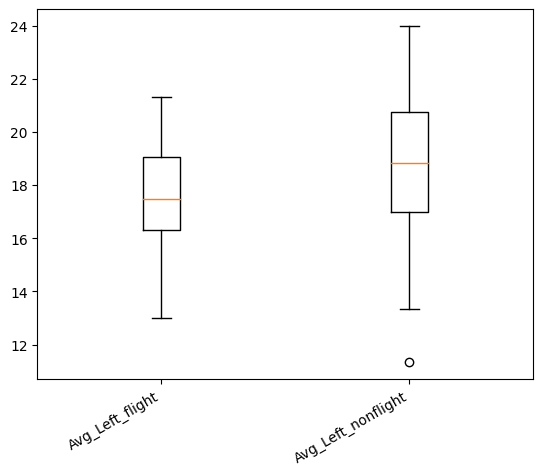

field:  Avg_Left
excluding samples:  ['FViv1', 'FViv2', 'FViv3', 'FViv4', 'FViv5', 'FViv6', 'FViv7', 'FViv8', 'FViv9', 'FViv10', 'FViv11', 'FViv12', 'FViv13', 'FViv14', 'FViv15', 'FViv16', 'FViv17', 'FViv18', 'FViv19', 'FViv20']
{'Avg_Left': {'t-test p-value': 0.00076, 'wilcoxon p-value': 0.0017, 'ks-test p-value': 0.00871}}
n flight =  20
n nonflight =  60


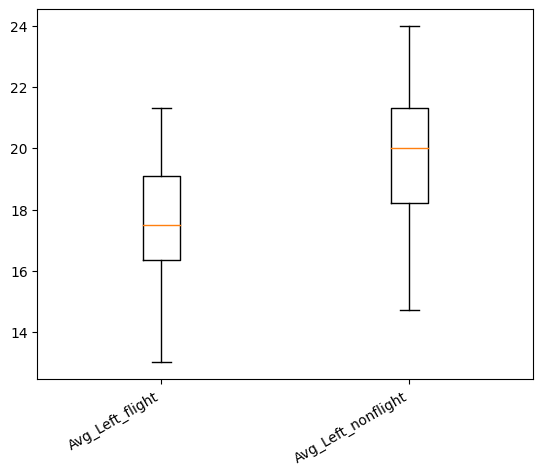

In [ ]:
# plot a box plot for the Avg_Left field of the tonometry data for ground and spaceflight samples
m.plotbox_and_stats(data_=data['iop'], sample_key = 'Source Name', field='Avg_Left', treatment='Factor Value: Spaceflight', space="Space Flight", exclude_samples=[])
exclude_list=m.exclude_samples_by_prefix(data['iop'], prefix="FViv", colname="Source Name")
m.plotbox_and_stats(data_=data['iop'], sample_key = 'Source Name', field='Avg_Left', treatment='Factor Value: Spaceflight', space="Space Flight", exclude_samples=exclude_list)

## **Explore the Avg_Right tonometry**

field:  Avg_Right
excluding samples:  []
{'Avg_Right': {'t-test p-value': 0.00054, 'wilcoxon p-value': 0.00195, 'ks-test p-value': 0.00461}}
n flight =  20
n nonflight =  80


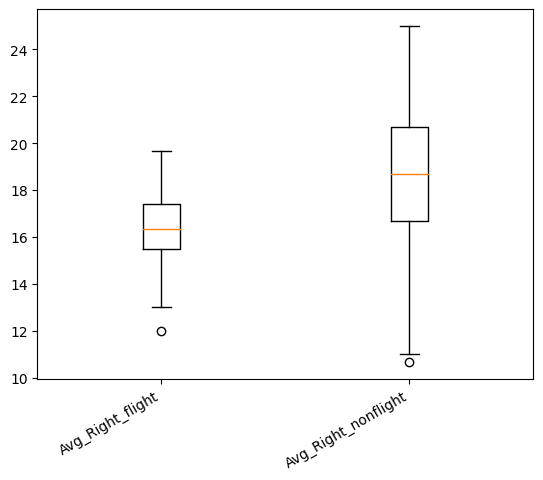

field:  Avg_Right
excluding samples:  ['FViv1', 'FViv2', 'FViv3', 'FViv4', 'FViv5', 'FViv6', 'FViv7', 'FViv8', 'FViv9', 'FViv10', 'FViv11', 'FViv12', 'FViv13', 'FViv14', 'FViv15', 'FViv16', 'FViv17', 'FViv18', 'FViv19', 'FViv20']
{'Avg_Right': {'t-test p-value': 0.0, 'wilcoxon p-value': 0.0, 'ks-test p-value': 2e-05}}
n flight =  20
n nonflight =  60


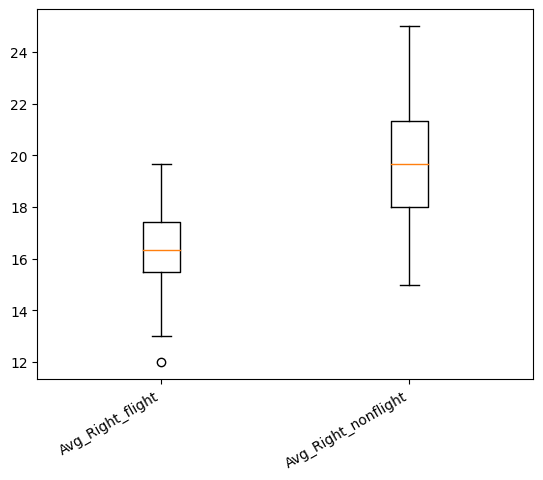

In [ ]:
# plot a box plot for the Avg_Right field of the tonometry data for ground and spaceflight samples
m.plotbox_and_stats(data_=data['iop'], sample_key = 'Source Name', field='Avg_Right', treatment='Factor Value: Spaceflight', space="Space Flight", exclude_samples=[])
exclude_list=m.exclude_samples_by_prefix(data['iop'], prefix="FViv", colname="Source Name")
m.plotbox_and_stats(data_=data['iop'], sample_key = 'Source Name', field='Avg_Right', treatment='Factor Value: Spaceflight', space="Space Flight", exclude_samples=exclude_list)

**QUESTIONS**

1. Does excluding the FViv samples from consideration provide better separation between the distributions of IOP?

2. Are the `Avg_Left` and `Avg_Right` distributions comparably dissimilar between flight and non-flight samples?

3. How might you use both `Avg_Left` and `Avg_Right` values to create a single metric for machine learning modeling?

**Double click here to enter your answers to the questions above.**

1.

2.

3.